# Proyecto machine learning 

### Leonardo Tammaro

Importo librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

%config Completer.use_jedi = False
%matplotlib inline

Importo datasets

In [2]:
#Import Dataset 
Dataset_training = pd.read_csv("Data/train.csv" , sep=",")
Dataset_test = pd.read_csv("Data/test.csv" , sep=",")

#set ID column to index 
Dataset_training = Dataset_training.set_index("Id")
Dataset_test= Dataset_test.set_index("Id")

#Observo
Dataset_training.head()
Dataset_test.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Analisis exploratorio de datos 

1. Tipos de variable: 

In [3]:
# Datos de entrenamiento 

#number of observations and features
dimensiones_train = Dataset_training.shape
#type of variables in the dataset 
Dataset_training.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
#Test set 
dimensiones_test = Dataset_test.shape
Dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

Missing values 

In [5]:
#Datos entrenamiento 

#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_training.isnull().sum().sort_values(ascending=False)
percent = (Dataset_training.isnull().sum()/Dataset_training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(22)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [6]:
#test set 
#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_test.isnull().sum().sort_values(ascending=False)
percent = (Dataset_test.isnull().sum()/Dataset_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(22)


,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461
GarageQual,78,0.053461
GarageCond,78,0.053461


Se observa que en el test set hay mas variables con valores restante. Ej: functionality salia como 0 en training y aqui tiene 2

algunas variables categoricas se tienen como numericas, pero son categoricas 

In [7]:
#training set 

Dataset_training['OverallQual'] = Dataset_training['OverallQual'].astype("category")
Dataset_training['MSSubClass'] = Dataset_training['MSSubClass'].astype("category")
Dataset_training['OverallCond'] = Dataset_training['OverallCond'].astype("category")
Dataset_training['MoSold'] = Dataset_training['MoSold'].astype("category")

Dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          91 non-null     object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

In [8]:
#test set 
Dataset_test['OverallQual'] = Dataset_test['OverallQual'].astype("category")
Dataset_test['MSSubClass'] = Dataset_test['MSSubClass'].astype("category")
Dataset_test['OverallCond'] = Dataset_test['OverallCond'].astype("category")
Dataset_test['MoSold'] = Dataset_test['MoSold'].astype("category")

Dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          91 non-null     object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

### Analisis de la variable respuesta

C:\Users\yotam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

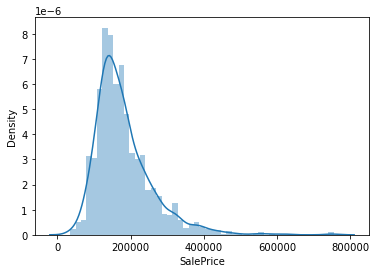

In [9]:
sns.distplot(Dataset_training['SalePrice'])

C:\Users\yotam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

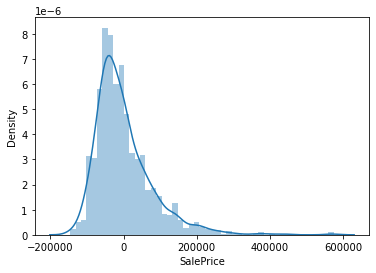

In [10]:
Media = Dataset_training.SalePrice.mean()
Precio_menos_media =Dataset_training['SalePrice'] - Media
sns.distplot(Precio_menos_media)

Observo que tanto sigue una distribucion normal 

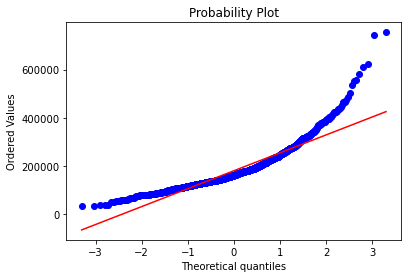

In [11]:
QQplot = plt.figure()
res = stats.probplot(Dataset_training['SalePrice'], plot=plt)
plt.show()

Mientras mas se alinea con la linea roja mas se acerca a una distribucion normal
Se observa que la variable dependiente no coincide mucho con la linea roja. 

C:\Users\yotam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

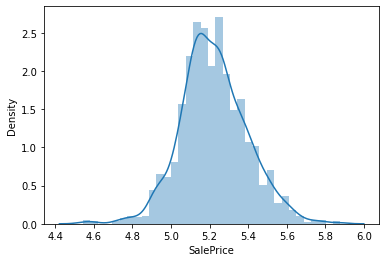

In [12]:
sns.distplot(np.log10(Dataset_training['SalePrice']))

### Numerical features

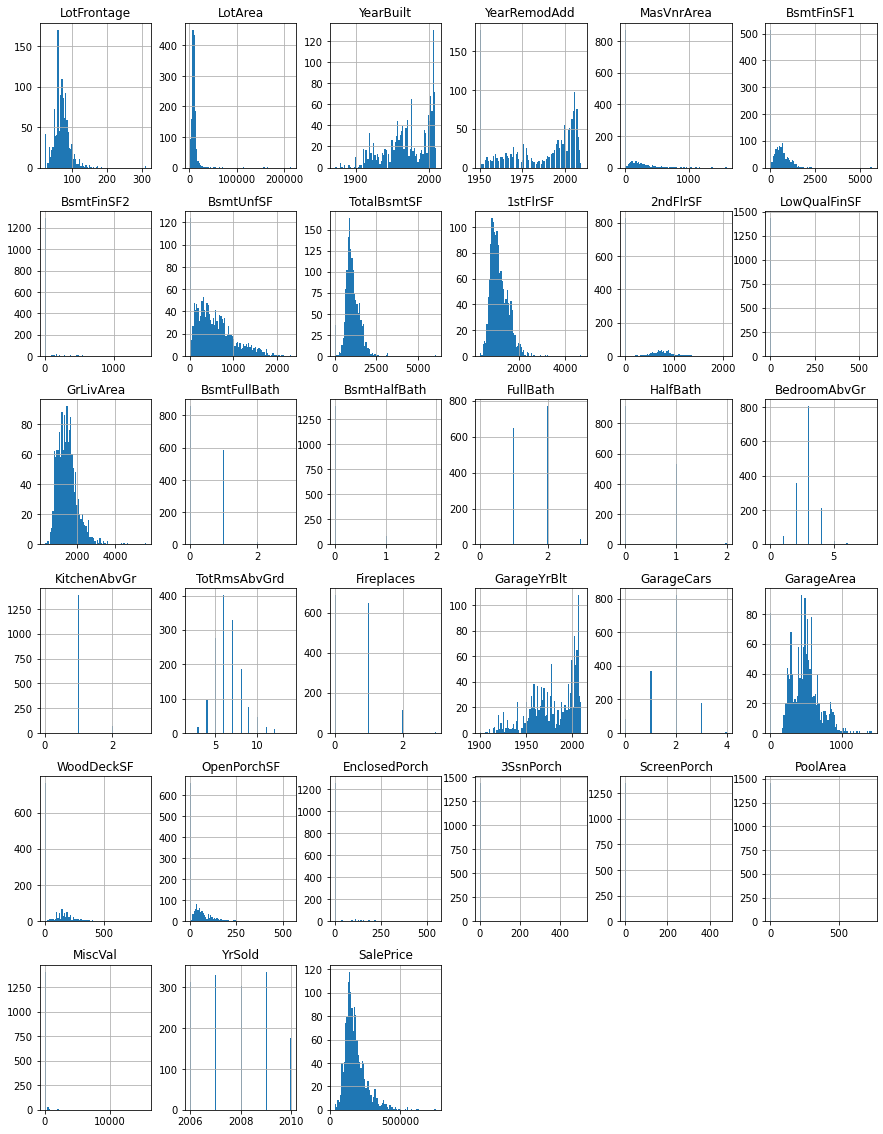

In [13]:
Dataset_training.hist(bins=80, figsize=(15,20));

Numeric variable correlation

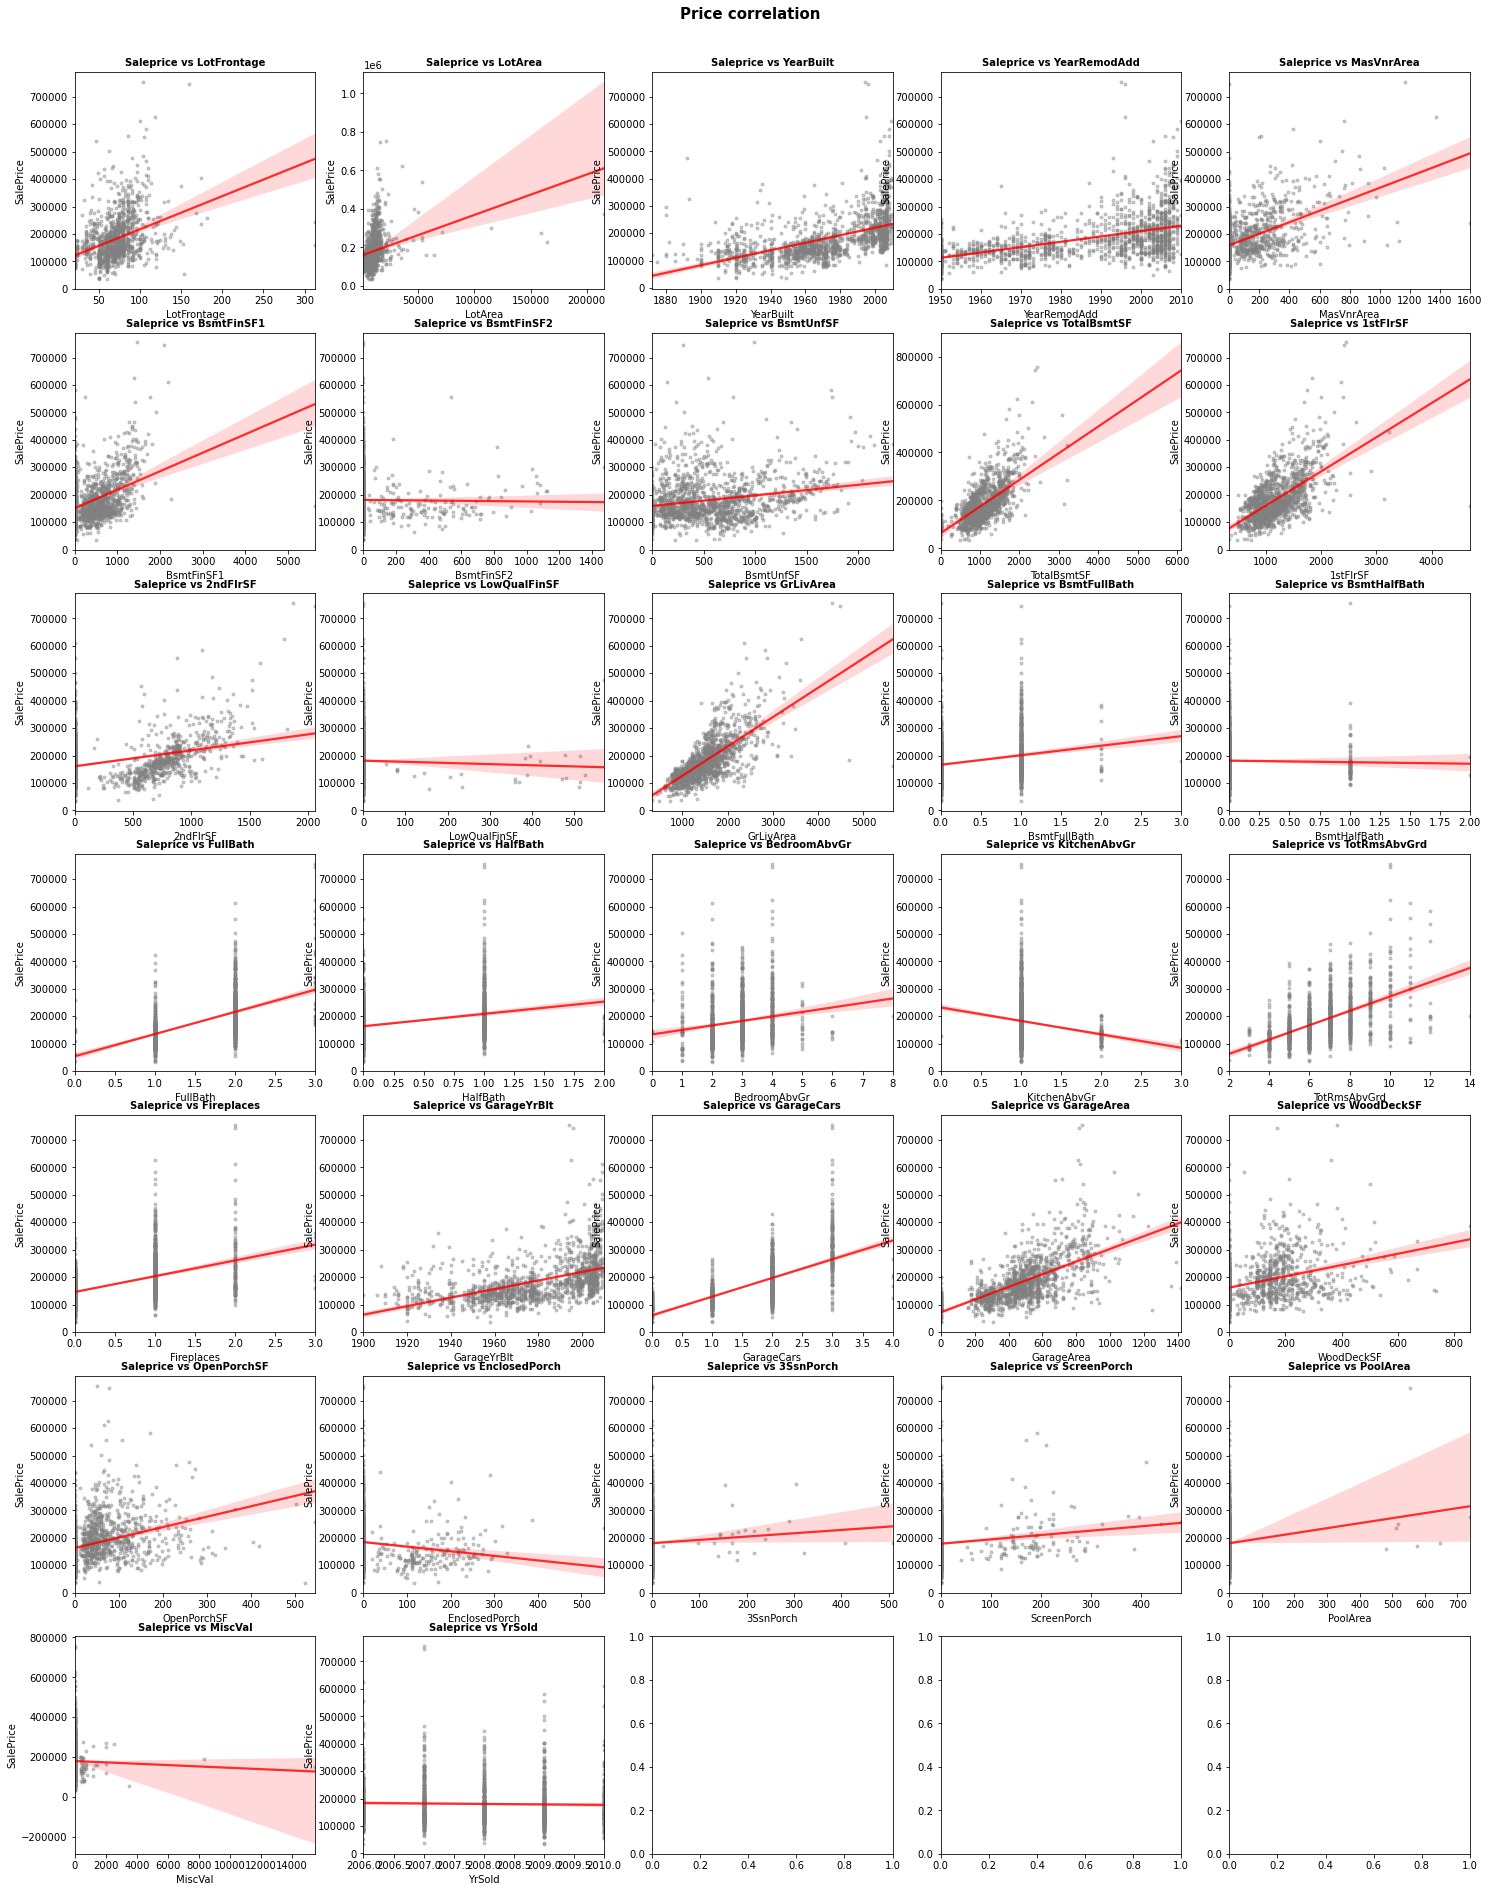

In [14]:
numeric_cols = Dataset_training.select_dtypes(['int64', 'float64']).columns
numeric_cols = numeric_cols.drop(['SalePrice'])

fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(25,30))
ax = ax.flat

#Introduci robust para reducirle pesos a los outliers 
for i, c in enumerate(numeric_cols):
    sns.regplot(data=Dataset_training, x=c, 
                y='SalePrice', 
                ax=ax[i], 
                color = 'gray', 
                marker='.',
                scatter_kws={'alpha':0.4},
                line_kws={'color':'red', 'alpha':0.8});
    
    ax[i].set_title(f"Saleprice vs {c}", fontsize = 10, fontweight = "bold")
    
    
plt.subplots_adjust(top=0.95)
fig.suptitle('Price correlation', fontsize = 15, fontweight = "bold");
plt.show()


Se observan bastante outliers 

### Matriz de correlacion para features numericos 

In [14]:
corr = Dataset_training.corr(method = "pearson")
corr.style.background_gradient(cmap = 'coolwarm')

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.007450,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,-0.041258,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,-0.014969,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,-0.013604,0.605852


Se observan variables muy correlacionadas

GarageBuilt y Yearbuilt estan muy correlacionadas y Yearbuilt tiene mas influencia. Quito garage Built 

In [15]:
#Training
Dataset_training= Dataset_training.drop(["GarageYrBlt"] , axis=1)

#test
Dataset_test = Dataset_test.drop(["GarageYrBlt"] , axis=1)

GarageArea y GarageCar y GarageCar tiene mas ifluencia. Quito garage area

In [16]:
#Training
Dataset_training= Dataset_training.drop(["GarageArea"] , axis=1)

#test
Dataset_test = Dataset_test.drop(["GarageArea"] , axis=1)

GrlivingArea y TotalRoomABove. GrlivingArea tiene mas influencia en SalePrice. Quito TotalRoomAbove

In [17]:
#Training
Dataset_training= Dataset_training.drop(["TotRmsAbvGrd"] , axis=1)

#test
Dataset_test = Dataset_test.drop(["TotRmsAbvGrd"] , axis=1)

Se combinaran algunos features para aumentar la influencia en la variable dependiente 

In [18]:
#Crear una variable que sea el total square feet 
#Training
Dataset_training['TotalSF'] = Dataset_training['BsmtFinSF1'] + Dataset_training['BsmtFinSF2'] + Dataset_training['1stFlrSF'] + Dataset_training['2ndFlrSF']

#test
Dataset_test['TotalSF'] = Dataset_test['BsmtFinSF1'] + Dataset_test['BsmtFinSF2'] + Dataset_test['1stFlrSF'] + Dataset_test['2ndFlrSF']

#Correlacion de TotalSF y p valor
import scipy.stats
scipy.stats.pearsonr(Dataset_training.TotalSF,Dataset_training.SalePrice) 
Dataset_training.head()
#Se observa un buen valor del 70% , influye mas que cada una de las variables independientes. La mayor era 1stFloorSF con 61%

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2416
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2240
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2272
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1933
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2853


In [19]:
Dataset_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1508.0
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,2252.0
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,2420.0
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,2206.0
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,1543.0


In [20]:
# Total Number of bathrooms 
#training
Dataset_training['TotalBath'] = ( Dataset_training['FullBath'] + (0.5 * Dataset_training['HalfBath']) +
                        Dataset_training['BsmtFullBath'] + (0.5 * Dataset_training['BsmtHalfBath']))

#test
Dataset_test['TotalBath'] = ( Dataset_test['FullBath'] + (0.5 * Dataset_test['HalfBath']) +
                        Dataset_test['BsmtFullBath'] + (0.5 * Dataset_test['BsmtHalfBath']))



#Correlacion de TotalSF y p valor
import scipy.stats
scipy.stats.pearsonr(Dataset_training.TotalBath,Dataset_training.SalePrice) 

#Influye masque cada una de las variables independientes. La variable Fullbath era la que mas influia en la salida con 56%. 
#Se aumento el porcentaje

(0.6317310679319874, 1.880050790269157e-163)

In [21]:
# Total square feet of porch in a house

#training
Dataset_training['TotalPorchSF'] = ( Dataset_training['OpenPorchSF'] + Dataset_training['3SsnPorch'] +
                           Dataset_training['EnclosedPorch'] + Dataset_training['ScreenPorch'] + Dataset_training['WoodDeckSF'])

#test
Dataset_test['TotalPorchSF'] = ( Dataset_test['OpenPorchSF'] + Dataset_test['3SsnPorch'] +
                           Dataset_test['EnclosedPorch'] + Dataset_test['ScreenPorch'] + Dataset_test['WoodDeckSF'])

#Correlacion de TotalSF y p valor
import scipy.stats
scipy.stats.pearsonr(Dataset_training.TotalPorchSF,Dataset_training.SalePrice) 

#Se observa una influencia del 39% , influye mas que cada una de las variables independientes. La mayor era WoodDeckSF con 32%


(0.3909930203595834, 1.5838308644035897e-54)

In [22]:
Dataset_training.head()
Dataset_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalBath,TotalPorchSF
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,MnPrv,NaN,0,6,2010,WD,Normal,1508.0,1.0,260
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,Gar2,12500,6,2010,WD,Normal,2252.0,1.5,429
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,MnPrv,NaN,0,3,2010,WD,Normal,2420.0,2.5,246
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,6,2010,WD,Normal,2206.0,2.5,396
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,NaN,NaN,0,1,2010,WD,Normal,1543.0,2.0,226


Se estableceran unas condiciones binarias, por ejemplo si hay piscina o no , si tiene garaje, entre otros para lograr una mejor calidad de los datos 


In [23]:
#training
Dataset_training['IsRemodel']= Dataset_training[['YearBuilt', 'YearRemodAdd']].apply(lambda x: 1 if x[0] != x[1] else 0, axis=1)
Dataset_training['HasPool']= Dataset_training['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
Dataset_training['Has2ndFloor']= Dataset_training['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
Dataset_training['HasGarage']= Dataset_training['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
Dataset_training['HasBsmt']= Dataset_training['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
Dataset_training['HasFireplace']= Dataset_training['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

#test
Dataset_test['IsRemodel']= Dataset_test[['YearBuilt', 'YearRemodAdd']].apply(lambda x: 1 if x[0] != x[1] else 0, axis=1)
Dataset_test['HasPool']= Dataset_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
Dataset_test['Has2ndFloor']= Dataset_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
Dataset_test['HasGarage']= Dataset_test['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
Dataset_test['HasBsmt']= Dataset_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
Dataset_test['HasFireplace']= Dataset_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


Paso las variables anteriores a categoricas

In [24]:
#Training
Dataset_training['IsRemodel'] = Dataset_training['IsRemodel'].astype("category")
Dataset_training['HasPool'] = Dataset_training['HasPool'].astype("category")
Dataset_training['Has2ndFloor'] = Dataset_training['Has2ndFloor'].astype("category")
Dataset_training['HasGarage'] = Dataset_training['HasGarage'].astype("category")
Dataset_training['HasBsmt'] = Dataset_training['HasBsmt'].astype("category")
Dataset_training['HasFireplace'] = Dataset_training['HasFireplace'].astype("category")

#test 
Dataset_test['IsRemodel'] = Dataset_test['IsRemodel'].astype("category")
Dataset_test['HasPool'] = Dataset_test['HasPool'].astype("category")
Dataset_test['Has2ndFloor'] = Dataset_test['Has2ndFloor'].astype("category")
Dataset_test['HasGarage'] = Dataset_test['HasGarage'].astype("category")
Dataset_test['HasBsmt'] = Dataset_test['HasBsmt'].astype("category")
Dataset_test['HasFireplace'] = Dataset_test['HasFireplace'].astype("category")

In [25]:
Dataset_training.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SalePrice,TotalSF,TotalBath,TotalPorchSF,IsRemodel,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,208500,2416,3.5,61,0,0,1,1,1,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,181500,2240,2.5,298,0,0,0,1,1,1
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,223500,2272,3.5,42,1,0,1,1,1,1
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,140000,1933,2.0,307,1,0,1,1,1,1
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,250000,2853,3.5,276,0,0,1,1,1,1


In [26]:
Dataset_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,TotalSF,TotalBath,TotalPorchSF,IsRemodel,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Normal,1508.0,1.0,260,0,0,0,1,1,0
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Normal,2252.0,1.5,429,0,0,0,1,1,0
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Normal,2420.0,2.5,246,1,0,1,1,1,1
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Normal,2206.0,2.5,396,0,0,1,1,1,1
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,Normal,1543.0,2.0,226,0,0,0,1,1,0


### Variables Qualitativas o categoricas

Informacion estadistica de cada varible

In [27]:
#training set
Dataset_training.select_dtypes(include=['object', "category"]).describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MiscFeature,MoSold,SaleType,SaleCondition,IsRemodel,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,54,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,4,12,9,6,2,2,2,2,2,2
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Shed,6,WD,Normal,0,0,0,1,1,1
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,49,253,1267,1198,764,1453,829,1379,1423,770


In [28]:
#test set
Dataset_test.select_dtypes(include=['object', "category"]).describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MiscFeature,MoSold,SaleType,SaleCondition,IsRemodel,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
count,1459,1455,1459,107,1459,1459,1457,1459,1459,1459,...,51,1459,1458,1459,1459,1459,1459,1459,1459,1459
unique,16,5,2,2,4,4,1,5,3,25,...,3,12,9,6,2,2,2,2,2,2
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Shed,6,WD,Normal,0,0,0,1,1,0
freq,543,1114,1453,70,934,1311,1457,1081,1396,218,...,46,250,1258,1204,796,1453,839,1382,1417,730


C:\Users\yotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yotam\anaconda3\lib\si

C:\Users\yotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yotam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yotam\anaconda3\lib\si

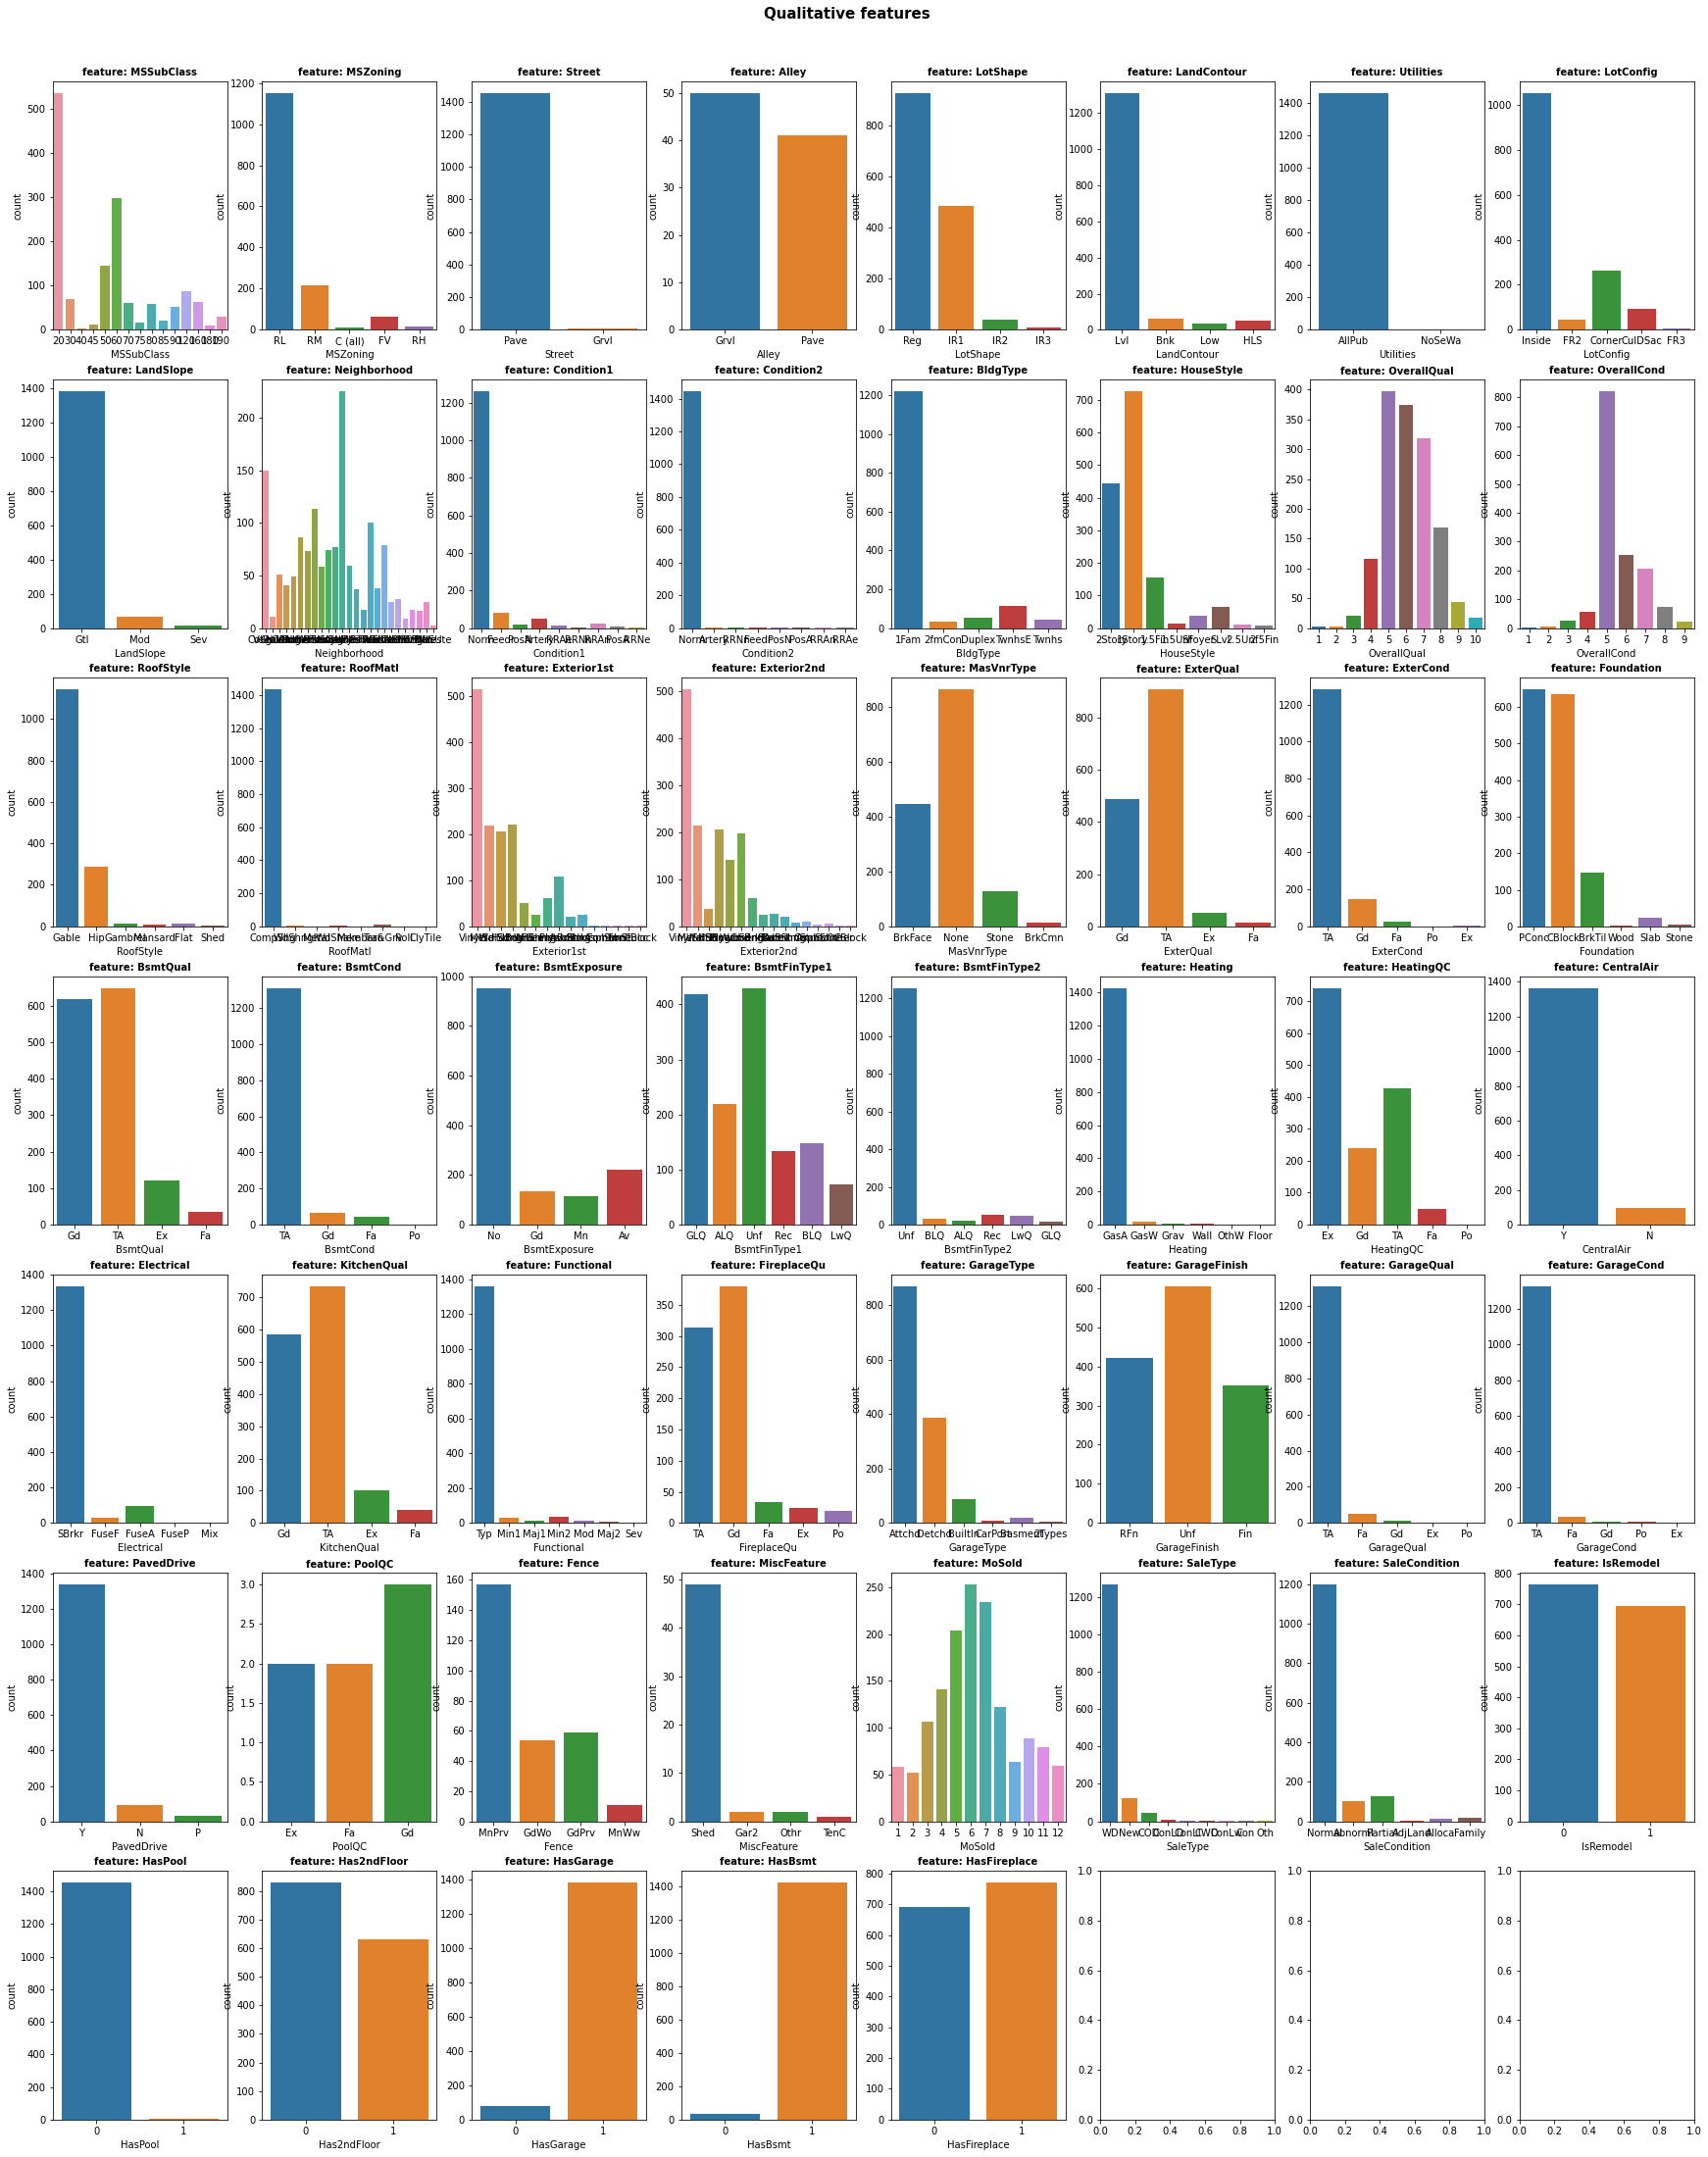

In [29]:
cat_columns = Dataset_training.select_dtypes(include=['object', "category"]).columns

fig, ax = plt.subplots(7,8, figsize=(30,35))
ax = ax.flat

for i, c in enumerate(cat_columns):
    sns.countplot(Dataset_training[c], ax=ax[i])
    ax[i].set_title(f"feature: {c}", fontsize = 10, fontweight = "bold")
    
plt.subplots_adjust(top=0.95)
fig.suptitle('Qualitative features', fontsize = 15, fontweight = "bold");

En algunas variables se observan valores con muy poca frecuencia, posteriormente se trataran dichas variables

Relacion de variables categoricas con la variable de salida 

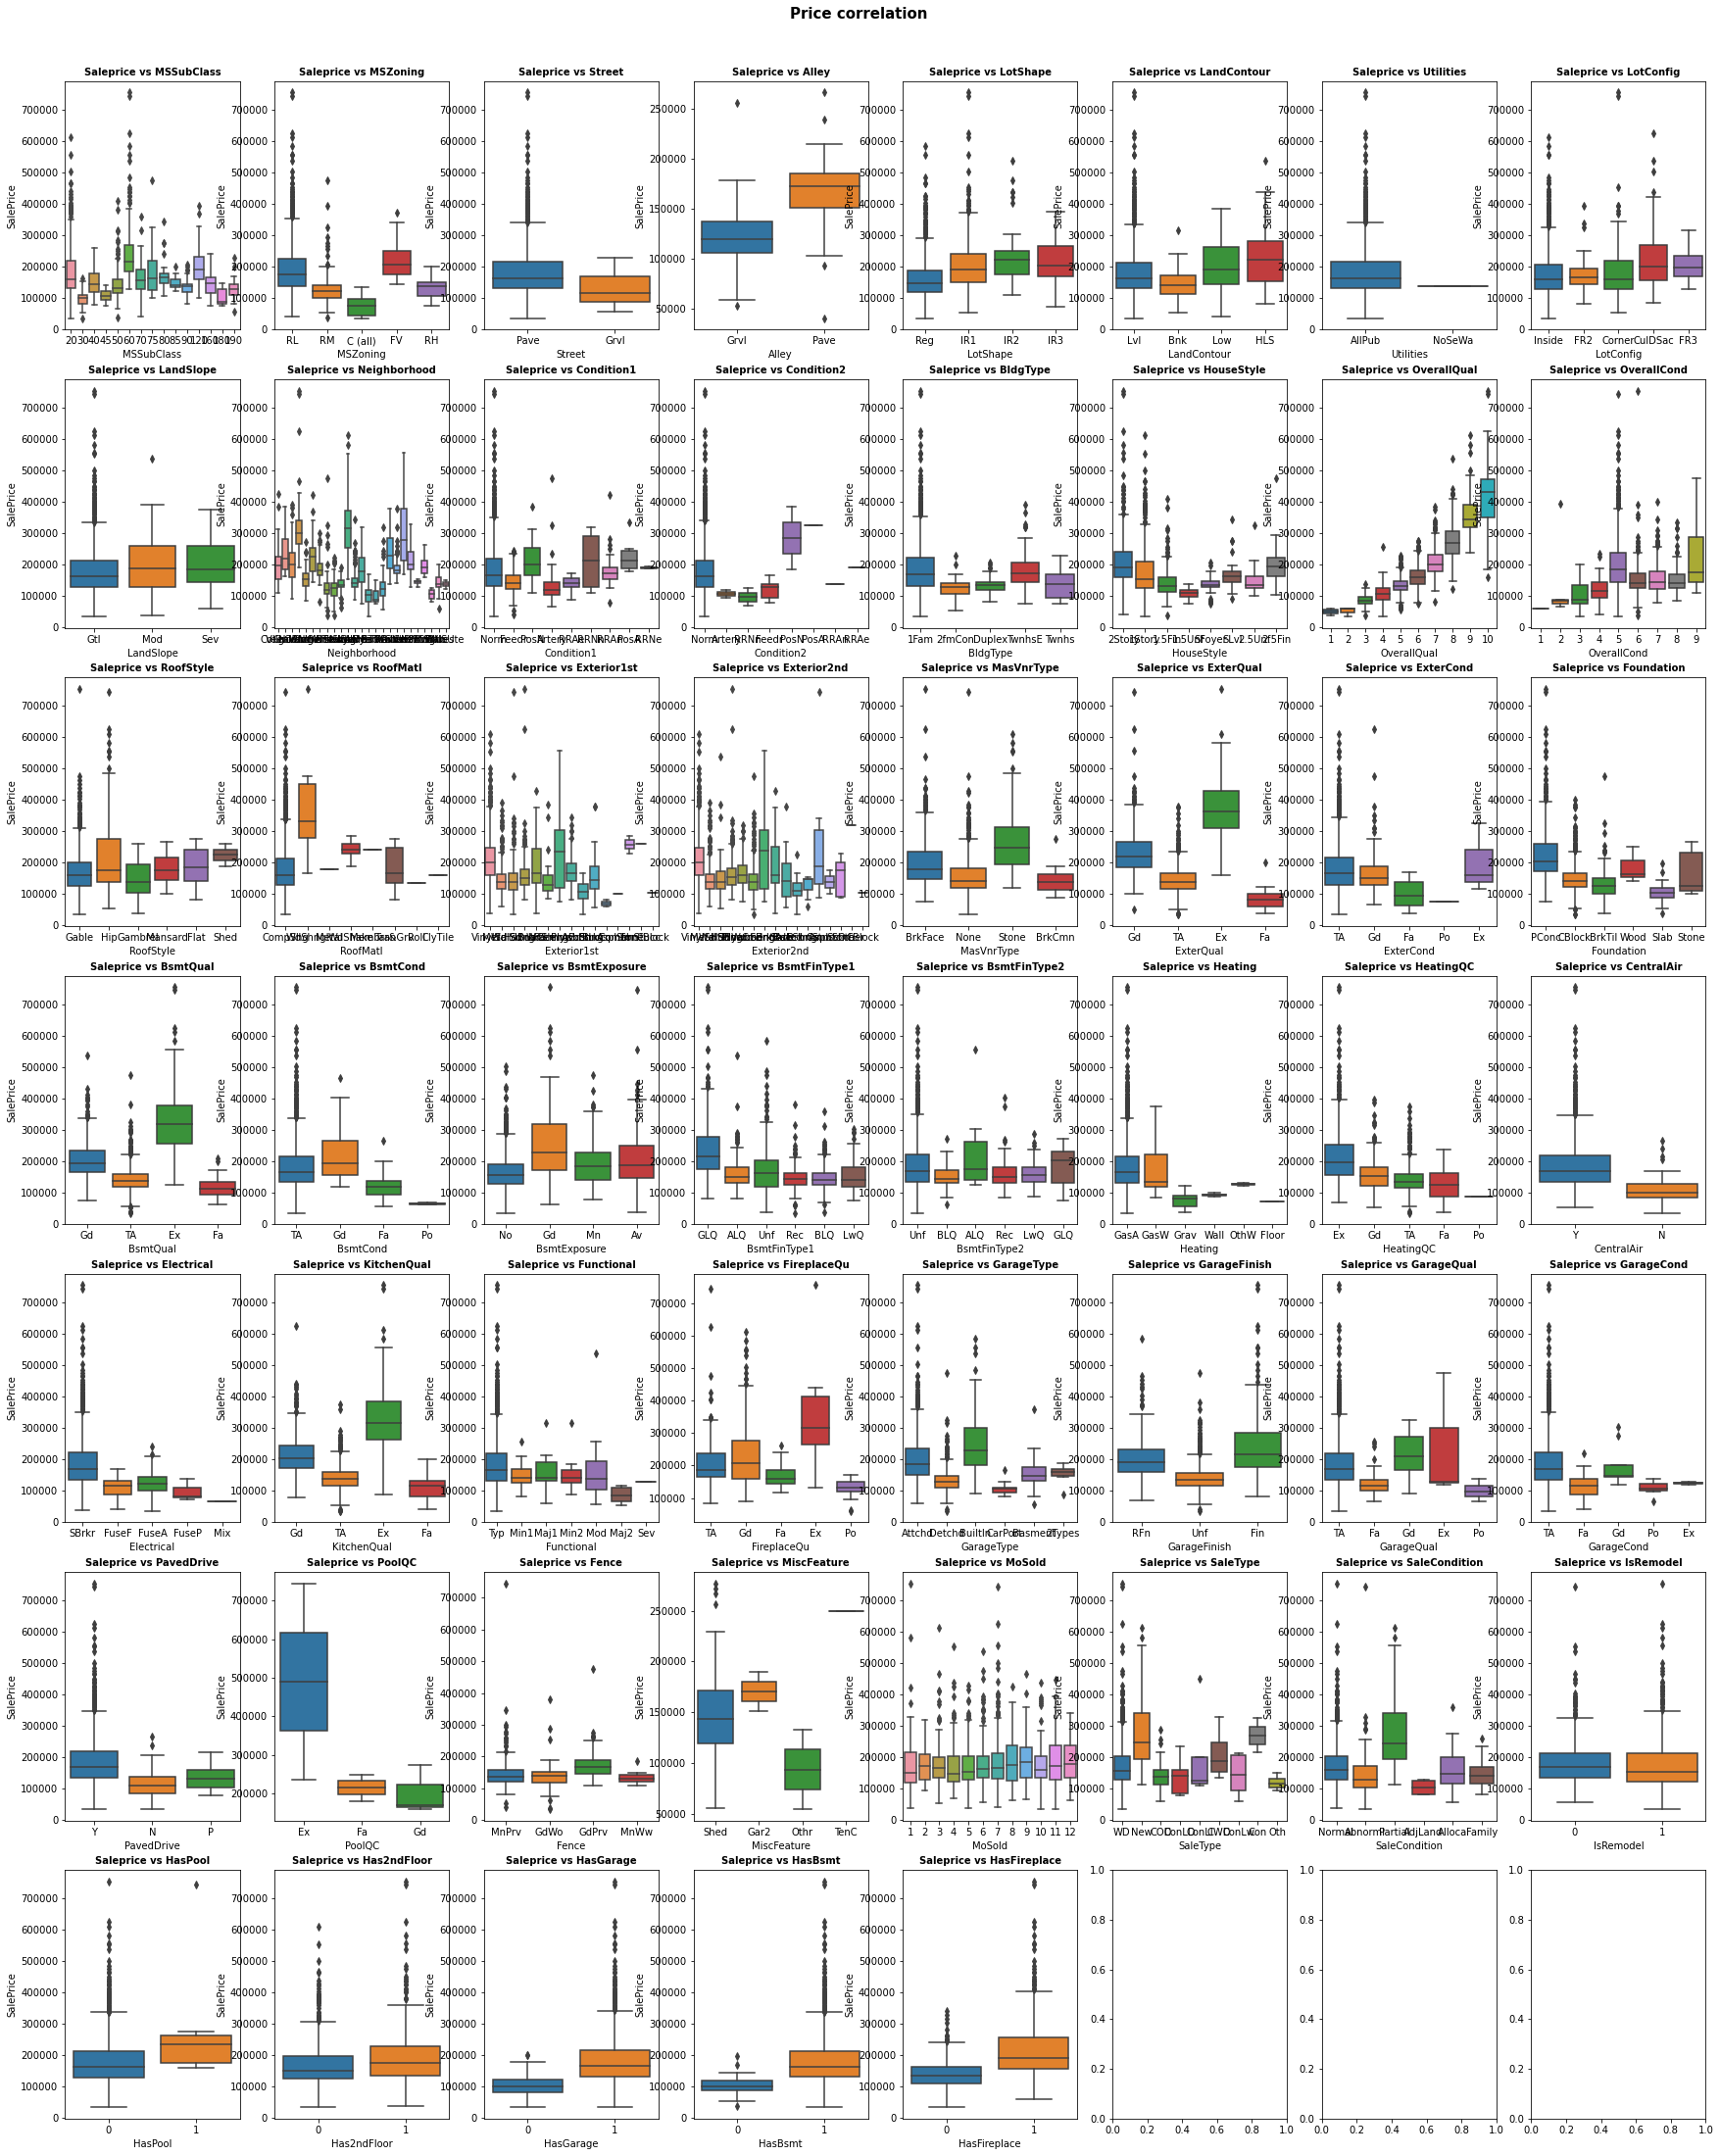

In [30]:
cat_columns = Dataset_training.select_dtypes(include=['object', "category"]).columns

fig, ax = plt.subplots(nrows=7, ncols=8, figsize=(30,35))
ax = ax.flat

for i, c in enumerate(cat_columns):
    sns.boxplot(
        x     = c,
        y     = 'SalePrice',
        data  = Dataset_training,
        ax    = ax[i]
    )
    
    ax[i].set_title(f"Saleprice vs {c}", fontsize = 10, fontweight = "bold")


plt.subplots_adjust(top=0.95)
fig.suptitle('Price correlation', fontsize = 15, fontweight = "bold");
plt.show()

## Feature engineering

las columnas de yearbuilt, yearremodadd, yeargaragebuilt, yrbuiltse pasaron a numericas, restandolo con respecto al 2021 

In [31]:
def AgeYearOld(year): 
    return year.apply(lambda x: 0 if x==0 else (2021 - x))

#Training set 
Dataset_training.YearBuilt = AgeYearOld(Dataset_training.YearBuilt)
Dataset_training.YearRemodAdd= AgeYearOld(Dataset_training.YearRemodAdd)
Dataset_training.YrSold= AgeYearOld(Dataset_training.YrSold)

#test set 
Dataset_test.YearBuilt = AgeYearOld(Dataset_test.YearBuilt)
Dataset_test.YearRemodAdd= AgeYearOld(Dataset_test.YearRemodAdd)
Dataset_test.YrSold= AgeYearOld(Dataset_test.YrSold)

Dataset_test.YrSold.head()

Id
1461    11
1462    11
1463    11
1464    11
1465    11
Name: YrSold, dtype: int64

### Missing values 

Se observo que las variables Miscfeature,Fence,PoolQC, Alley tenian muchos valores NA pero pertenecen a la que No tienen ese feature. 
Cambio los NA por el tipo none

In [32]:
#Training set
Dataset_training.Alley = Dataset_training.Alley.fillna('None')
Dataset_training.MiscFeature = Dataset_training.MiscFeature.fillna('None')
Dataset_training.Fence = Dataset_training.Fence.fillna('None')
Dataset_training.PoolQC = Dataset_training.PoolQC.fillna('None')

#test set 
Dataset_test.Alley = Dataset_test.Alley.fillna('None')
Dataset_test.MiscFeature = Dataset_test.MiscFeature.fillna('None')
Dataset_test.Fence = Dataset_test.Fence.fillna('None')
Dataset_test.PoolQC = Dataset_test.PoolQC.fillna('None')


Dataset_test.PoolQC.head()

Id
1461    None
1462    None
1463    None
1464    None
1465    None
Name: PoolQC, dtype: object

El mismo caso anterior pasa con BsmtQual,BsmtCond,BsmtExpo,BsmetFinType1, BsmetFinType2,FireplaceQual,GarageType,GarageFinish
, GarQual, GarCond

In [33]:
#Training set
Dataset_training.BsmtQual= Dataset_training.BsmtQual.fillna('None')
Dataset_training.BsmtCond = Dataset_training.BsmtCond.fillna('None')
Dataset_training.BsmtExposure = Dataset_training.BsmtExposure.fillna('None')
Dataset_training.BsmtFinType1 = Dataset_training.BsmtFinType1.fillna('None')

Dataset_training.BsmtFinType2= Dataset_training.BsmtFinType2.fillna('None')
Dataset_training.FireplaceQu = Dataset_training.FireplaceQu.fillna('None')
Dataset_training.GarageType = Dataset_training.GarageType.fillna('None')
Dataset_training.GarageFinish = Dataset_training.GarageFinish.fillna('None')

Dataset_training.GarageQual = Dataset_training.GarageQual.fillna('None')
Dataset_training.GarageCond = Dataset_training.GarageCond.fillna('None')
Dataset_training.head()

#test set 
Dataset_test.BsmtQual= Dataset_test.BsmtQual.fillna('None')
Dataset_test.BsmtCond = Dataset_test.BsmtCond.fillna('None')
Dataset_test.BsmtExposure = Dataset_test.BsmtExposure.fillna('None')
Dataset_test.BsmtFinType1 = Dataset_test.BsmtFinType1.fillna('None')

Dataset_test.BsmtFinType2= Dataset_test.BsmtFinType2.fillna('None')
Dataset_test.FireplaceQu = Dataset_test.FireplaceQu.fillna('None')
Dataset_test.GarageType = Dataset_test.GarageType.fillna('None')
Dataset_test.GarageFinish = Dataset_test.GarageFinish.fillna('None')

Dataset_test.GarageQual = Dataset_test.GarageQual.fillna('None')
Dataset_test.GarageCond = Dataset_test.GarageCond.fillna('None')
Dataset_test.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,TotalSF,TotalBath,TotalPorchSF,IsRemodel,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,Normal,1508.0,1.0,260,0,0,0,1,1,0
1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,Normal,2252.0,1.5,429,0,0,0,1,1,0
1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,...,Normal,2420.0,2.5,246,1,0,1,1,1,1
1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,...,Normal,2206.0,2.5,396,0,0,1,1,1,1
1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,...,Normal,1543.0,2.0,226,0,0,0,1,1,0


se observan nuevamente loes features que tienen missing values 

In [34]:
#Training set

#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_training.isnull().sum().sort_values(ascending=False)
percent = (Dataset_training.isnull().sum()/Dataset_training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(7)

,Total,Percent
LotFrontage,259,0.177397
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
GarageType,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000


In [35]:
#test set

#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_test.isnull().sum().sort_values(ascending=False)
percent = (Dataset_test.isnull().sum()/Dataset_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(22)




,Total,Percent
LotFrontage,227,0.155586
MasVnrType,16,0.010966
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Functional,2,0.001371
Utilities,2,0.001371
TotalBath,2,0.001371
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
KitchenQual,1,0.000685


In [36]:
Dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1459 non-null   category
 1   MSZoning       1455 non-null   object  
 2   LotFrontage    1232 non-null   float64 
 3   LotArea        1459 non-null   int64   
 4   Street         1459 non-null   object  
 5   Alley          1459 non-null   object  
 6   LotShape       1459 non-null   object  
 7   LandContour    1459 non-null   object  
 8   Utilities      1457 non-null   object  
 9   LotConfig      1459 non-null   object  
 10  LandSlope      1459 non-null   object  
 11  Neighborhood   1459 non-null   object  
 12  Condition1     1459 non-null   object  
 13  Condition2     1459 non-null   object  
 14  BldgType       1459 non-null   object  
 15  HouseStyle     1459 non-null   object  
 16  OverallQual    1459 non-null   category
 17  OverallCond    1459 non-null  

features categoricos le aplico el valor que mas esta presente

features numericos le aplico la mediana 

Caso training habia que lidiar con 4 features: LotFrontage, MasVnrType, MasVnrArea, Electrical

In [37]:
#training
#LotFrontage y MasVnrArea son numericas 
col_numer = ["MasVnrArea", "LotFrontage"]
Dataset_training[col_numer] = Dataset_training.groupby("Neighborhood")[col_numer].transform(lambda x: x.fillna(x.median()))

#LotFrontage y Electrical son categoricas
col_categ = ["MasVnrType", "Electrical"]
Dataset_training[col_categ] = Dataset_training.groupby("Neighborhood")[col_categ].transform(lambda x: x.fillna(x.mode()[0]))



In [38]:
#Chequeo que no tengo ningun valor nulo en el datset de training 
Dataset_training.isnull().any().sum()

0

In [39]:
#Fill missing values de test 

#Variables numericas s
col_numer_test= ["MasVnrArea", "LotFrontage", "TotalBath", "BsmtFullBath", "BsmtHalfBath", "BsmtFinSF1", "TotalSF", "TotalBsmtSF", "BsmtFinSF2", "GarageCars", "BsmtUnfSF"]
Dataset_test[col_numer_test] = Dataset_test.groupby("Neighborhood")[col_numer_test].transform(lambda x: x.fillna(x.median()))

#variables categoricas
col_categ_test= ["MasVnrType", "Utilities", "MSZoning", "KitchenQual", "SaleType", "Exterior2nd", "Exterior1st","Functional"]
Dataset_test[col_categ_test] = Dataset_test.groupby("Neighborhood")[col_categ_test].transform(lambda x: x.fillna(x.mode()[0]))





In [40]:
#Chequeo que no tengo ningun valor nulo en el dataset de test 
Dataset_test.isnull().any().sum()

0

In [41]:
Dataset_training.shape

(1460, 86)

In [42]:
Dataset_test.shape

(1459, 85)

### Variable dependiente

Le aplico una transformacion logaritmica a Saleprice para que su distribucion se parezca mas a una normal

C:\Users\yotam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

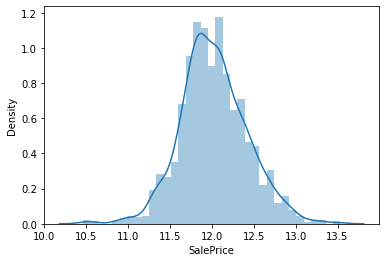

In [43]:
Dataset_training.SalePrice = np.log1p(Dataset_training.SalePrice)
sns.distplot(Dataset_training['SalePrice'])

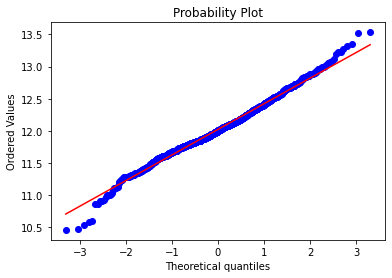

In [44]:
QQplot = plt.figure()
res = stats.probplot(Dataset_training['SalePrice'], plot=plt)
plt.show()

In [45]:
Dataset_training.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SalePrice,TotalSF,TotalBath,TotalPorchSF,IsRemodel,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,12.247699,2416,3.5,61,0,0,1,1,1,0
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,12.109016,2240,2.5,298,0,0,0,1,1,1
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,12.317171,2272,3.5,42,1,0,1,1,1,1
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,11.849405,1933,2.0,307,1,0,1,1,1,1
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,12.429220,2853,3.5,276,0,0,1,1,1,1


### Lidiando con valores asimetricos(skew features) en variables numericas, que se pueden alejar de una distribucion normal 

In [46]:
#training 

variables_numericas = Dataset_training.select_dtypes(include=["int64", "float64"]).columns

#Al igual que antes aplico transformacion logaritmica
skew_features = Dataset_training[variables_numericas].apply(lambda x: stats.skew(x)).sort_values(ascending=False)       

Asimetria = pd.DataFrame({'Skew' :skew_features})
#Mayores a 0.8
Asimetria = skew_features[abs(skew_features) > 0.8]
#Dropeo a los que no le voy aplicar nada
Asimetria = Asimetria.dropna()

for features in Asimetria.index:
    Dataset_training[features] = np.log1p(Dataset_training[features])

Dataset_training[Asimetria.index].head()

,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,...,LotFrontage,TotalSF,BsmtFinSF1,WoodDeckSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotalPorchSF,BsmtUnfSF,2ndFlrSF
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,9.042040,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,...,4.189655,7.790282,6.561031,0.000000,6.753438,6.753438,7.444833,4.127134,5.017280,6.751101
2,0.0,0.0,9.169623,0.0,0.0,0.693147,0.0,0.0,0.693147,0.000000,...,4.394449,7.714677,6.886532,5.700444,7.141245,7.141245,7.141245,5.700444,5.652489,0.000000
3,0.0,0.0,9.328212,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,...,4.234107,7.728856,6.188264,0.000000,6.825460,6.825460,7.488294,3.761200,6.075346,6.765039
4,0.0,0.0,9.164401,0.0,0.0,0.693147,0.0,0.0,0.000000,5.609472,...,4.110874,7.567346,5.379897,0.000000,6.629363,6.869014,7.448916,5.730100,6.293419,6.629363
5,0.0,0.0,9.565284,0.0,0.0,0.693147,0.0,0.0,0.000000,0.000000,...,4.442651,7.956477,6.486161,5.262690,7.044033,7.044033,7.695758,5.624018,6.196444,6.960348


In [47]:
#test

variables_numericas = Dataset_test.select_dtypes(include=["int64", "float64"]).columns

#Al igual que antes aplico transformacion logaritmica
skew_features = Dataset_test[variables_numericas].apply(lambda x: stats.skew(x)).sort_values(ascending=False)       

Asimetria = pd.DataFrame({'Skew' :skew_features})
#Mayores a 0.8
Asimetria = skew_features[abs(skew_features) > 0.8]
#Dropeo a los que no le voy aplicar nada
Asimetria = Asimetria.dropna()

for features in Asimetria.index:
    Dataset_test[features] = np.log1p(Dataset_test[features])

Dataset_test[Asimetria.index].head()

,PoolArea,MiscVal,LowQualFinSF,3SsnPorch,EnclosedPorch,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,LotArea,...,WoodDeckSF,TotalPorchSF,1stFlrSF,TotalSF,BsmtFinSF1,GrLivArea,BsmtUnfSF,2ndFlrSF,Fireplaces,TotalBsmtSF
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.0,0.000000,0.0,0.0,0.0,0.693147,4.976734,4.795791,0.0,9.360741,...,4.948760,5.564520,6.799056,7.319202,6.150603,6.799056,5.602119,0.000000,0.000000,6.783325
1462,0.0,9.433564,0.0,0.0,0.0,0.693147,0.000000,0.000000,0.0,9.565775,...,5.976351,6.063785,7.192934,7.720018,6.828712,7.192934,6.008813,0.000000,0.000000,7.192934
1463,0.0,0.000000,0.0,0.0,0.0,0.693147,0.000000,0.000000,0.0,9.534668,...,5.361292,5.509388,6.834109,7.791936,6.674561,7.396335,4.927254,6.553933,0.693147,6.834109
1464,0.0,0.000000,0.0,0.0,0.0,0.693147,0.000000,0.000000,0.0,9.208238,...,5.888878,5.983936,6.831954,7.699389,6.401917,7.380879,5.783825,6.520621,0.693147,6.831954
1465,0.0,0.000000,0.0,0.0,0.0,0.693147,0.000000,4.976734,0.0,8.518392,...,0.000000,5.424950,7.155396,7.342132,5.575949,7.155396,6.925595,0.000000,0.000000,7.155396


### Standarization and scaling of numerical variables

In [48]:
from sklearn.preprocessing import StandardScaler 

X_features = Dataset_training.drop(["SalePrice"], axis=1)
#Hago standarization and scaling 
Colnombres = X_features.select_dtypes(exclude=["object","category"]).columns
sc = StandardScaler()
Dataset_training[Colnombres] =sc.fit_transform(Dataset_training[Colnombres])

Dataset_training.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SalePrice,TotalSF,TotalBath,TotalPorchSF,IsRemodel,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,-0.083851,-0.133270,Pave,None,Reg,Lvl,AllPub,Inside,...,12.247699,0.701144,1.642256,-0.058991,0,0,1,1,1,0
2,20,RL,0.548825,0.113413,Pave,None,Reg,Lvl,AllPub,FR2,...,12.109016,0.493602,0.368581,0.699368,0,0,0,1,1,1
3,60,RL,0.053474,0.420049,Pave,None,IR1,Lvl,AllPub,Inside,...,12.317171,0.532523,1.642256,-0.235376,1,0,1,1,1,1
4,70,RL,-0.327231,0.103317,Pave,None,IR1,Lvl,AllPub,Corner,...,11.849405,0.089163,-0.268257,0.713663,1,0,1,1,1,1
5,60,RL,0.697736,0.878431,Pave,None,IR1,Lvl,AllPub,FR2,...,12.429220,1.157362,1.642256,0.662529,0,0,1,1,1,1


In [49]:
Dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 86 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   float64 
 4   Street         1460 non-null   object  
 5   Alley          1460 non-null   object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

In [50]:
# test set 
from sklearn.preprocessing import StandardScaler 

#Hago standarization and scaling 
Colnombres = Dataset_test.select_dtypes(exclude=["object","category"]).columns
sc = StandardScaler()
Dataset_test[Colnombres] =sc.fit_transform(Dataset_test[Colnombres])

Dataset_test.head()




,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,TotalSF,TotalBath,TotalPorchSF,IsRemodel,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,0.526150,0.561787,Pave,None,Reg,Lvl,AllPub,Inside,...,Normal,-0.555225,-1.475617,0.619188,0,0,0,1,1,0
1462,20,RL,0.573788,0.970407,Pave,None,IR1,Lvl,AllPub,Corner,...,Normal,0.541179,-0.873569,0.868889,0,0,0,1,1,0
1463,60,RL,0.240326,0.908413,Pave,None,IR1,Lvl,AllPub,Inside,...,Normal,0.737906,0.330528,0.591614,1,0,1,1,1,1
1464,60,RL,0.430876,0.257857,Pave,None,IR1,Lvl,AllPub,Inside,...,Normal,0.484751,0.330528,0.828953,0,0,1,1,1,1
1465,120,RL,-1.236435,-1.116969,Pave,None,IR1,HLS,AllPub,Inside,...,Normal,-0.492504,-0.271520,0.549383,0,0,0,1,1,0


### Binarization of Qualitive features 

In [51]:
Dataset_training= pd.get_dummies(Dataset_training)

Dataset_training.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HasPool_0,HasPool_1,Has2ndFloor_0,Has2ndFloor_1,HasGarage_0,HasGarage_1,HasBsmt_0,HasBsmt_1,HasFireplace_0,HasFireplace_1
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.083851,-0.133270,-1.050994,-0.878668,1.198613,0.779431,-0.355342,-0.340511,0.002513,-0.803645,...,1,0,0,1,0,1,0,1,1,0
2,0.548825,0.113413,-0.156734,0.429577,-0.812073,0.888257,-0.355342,0.002218,0.341114,0.418479,...,1,0,1,0,0,1,0,1,0,1
3,0.053474,0.420049,-0.984752,-0.830215,1.126511,0.654803,-0.355342,0.230372,0.065397,-0.576677,...,1,0,0,1,0,1,0,1,0,1
4,-0.327231,0.103317,1.863632,0.720298,-0.812073,0.384539,-0.355342,0.348034,-0.105819,-0.439421,...,1,0,0,1,0,1,0,1,0,1
5,0.697736,0.878431,-0.951632,-0.733308,1.418430,0.754400,-0.355342,0.295711,0.256237,0.112127,...,1,0,0,1,0,1,0,1,0,1


In [52]:

Dataset_test = pd.get_dummies(Dataset_test)

Dataset_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HasPool_0,HasPool_1,Has2ndFloor_0,Has2ndFloor_1,HasGarage_0,HasGarage_1,HasBsmt_0,HasBsmt_1,HasFireplace_0,HasFireplace_1
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.526150,0.561787,0.340945,1.072885,-0.782458,0.648862,2.234418,-0.002213,0.056162,-0.612887,...,1,0,1,0,0,1,0,1,1,0
1462,0.573788,0.970407,0.439695,1.214908,1.012224,0.877210,-0.369720,0.214273,0.396078,0.588954,...,1,0,1,0,0,1,0,1,1,0
1463,0.240326,0.908413,-0.844059,-0.678742,-0.782458,0.825301,-0.369720,-0.361447,0.098305,-0.505930,...,1,0,0,1,0,1,0,1,0,1
1464,0.430876,0.257857,-0.876976,-0.678742,0.382229,0.733490,-0.369720,0.094510,0.096517,-0.512506,...,1,0,0,1,0,1,0,1,0,1
1465,-1.236435,-1.116969,-0.679475,-0.394694,-0.782458,0.455352,-0.369720,0.702280,0.364927,0.474414,...,1,0,1,0,0,1,0,1,1,0


Se observan que no se tienen los mismos features

In [53]:
Dataset_training.SalePrice

Id
1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
          ...    
1456    12.072547
1457    12.254868
1458    12.493133
1459    11.864469
1460    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [54]:

train_cols = Dataset_training.columns
test_cols = Dataset_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

train_not_test

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'PoolQC_Fa',
       'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'SalePrice', 'Utilities_NoSeWa'],
      dtype='object')

Se observan que hay algunos tipos de categoria que no existen en el test set. 

Lo que se hara es eliminar dichas columnas del trainning set 

In [55]:
Dataset_training = Dataset_training.drop([ "Condition2_RRAe", "Condition2_RRAn","Condition2_RRNn","Electrical_Mix", "Exterior1st_ImStucc"
                                         , "Exterior1st_Stone", "Exterior2nd_Other", "GarageQual_Ex", "Heating_Floor", "Heating_OthW"
                                         , "HouseStyle_2.5Fin","MiscFeature_TenC", "PoolQC_Fa", "RoofMatl_ClyTile", "RoofMatl_Membran",
                                         "RoofMatl_Roll", "Utilities_NoSeWa"] , axis=1)



In [56]:
Dataset_training.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HasPool_0,HasPool_1,Has2ndFloor_0,Has2ndFloor_1,HasGarage_0,HasGarage_1,HasBsmt_0,HasBsmt_1,HasFireplace_0,HasFireplace_1
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.083851,-0.133270,-1.050994,-0.878668,1.198613,0.779431,-0.355342,-0.340511,0.002513,-0.803645,...,1,0,0,1,0,1,0,1,1,0
2,0.548825,0.113413,-0.156734,0.429577,-0.812073,0.888257,-0.355342,0.002218,0.341114,0.418479,...,1,0,1,0,0,1,0,1,0,1
3,0.053474,0.420049,-0.984752,-0.830215,1.126511,0.654803,-0.355342,0.230372,0.065397,-0.576677,...,1,0,0,1,0,1,0,1,0,1
4,-0.327231,0.103317,1.863632,0.720298,-0.812073,0.384539,-0.355342,0.348034,-0.105819,-0.439421,...,1,0,0,1,0,1,0,1,0,1
5,0.697736,0.878431,-0.951632,-0.733308,1.418430,0.754400,-0.355342,0.295711,0.256237,0.112127,...,1,0,0,1,0,1,0,1,0,1


## Creacion y prueba de modelos

### Aplico random forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
Dataset_training_SalePrice=Dataset_training.SalePrice
Dataset_training_feature=Dataset_training.drop(["SalePrice"], axis=1)

regressor_forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_forest.fit(Dataset_training_feature, Dataset_training_SalePrice)


RandomForestRegressor(n_estimators=10, random_state=0)

Calculo el error RMSLE, ya que es la metrica

In [58]:
from sklearn.model_selection import cross_val_score
#cross validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_forest, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.013158317151636085

Se observa un score bastante bajito

## Aplico Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
regressor_decision_tree = DecisionTreeRegressor(random_state = 0)
regressor_decision_tree.fit(Dataset_training_feature, Dataset_training_SalePrice)

DecisionTreeRegressor(random_state=0)

Calculo RMSLE

In [60]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_decision_tree, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.017834499707603663

 Se observa un aumento en el error, luego es mejor el RandomForest

## Support vector regressor

In [61]:
from sklearn.svm import SVR

regressor_SVR = SVR(kernel = 'rbf')
regressor_SVR.fit(Dataset_training_feature, Dataset_training_SalePrice)

SVR()

calculo RMSLE

In [62]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_SVR, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.030839455852241255

Se observa un aumento del error 

## Lasso regressor

In [63]:
from sklearn import linear_model

regressor_lasso = linear_model.Lasso(alpha=1.0)
regressor_lasso.fit(Dataset_training_feature,Dataset_training_SalePrice)

Lasso()

calculo RMLSE

In [64]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_lasso, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.03322110794311012

 Se observa un aumento del error

# Ridge regressor 

In [65]:
regressor_Ridge = linear_model.Ridge(alpha=1.0)
regressor_Ridge.fit(Dataset_training_feature,Dataset_training_SalePrice)

Ridge()

RMLSE

In [66]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_Ridge, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.011269745087190423

Se observa de todos los algoritmos desarolladoa hasta ahora es el que mejor RMLE da. Luego, le sigue el random forest con 0.01325

## KNN regressor 

In [67]:
from sklearn.neighbors import KNeighborsRegressor

regressor_KNN = KNeighborsRegressor(n_neighbors=5)
regressor_KNN.fit(Dataset_training_feature,Dataset_training_SalePrice)

KNeighborsRegressor()

RMLSE

In [68]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_KNN, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.014961002747771537

El error empeora

## Bayesian ridge regressor

In [69]:
regressor_Ridge_Bayesian = linear_model.BayesianRidge()
regressor_Ridge_Bayesian.fit(Dataset_training_feature,Dataset_training_SalePrice)

BayesianRidge()

RMLSE

In [70]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_Ridge_Bayesian, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.010761790781773153

Se observa una mejora en el error. Por ahora la mejor ha sido este metodo

## Gradient Boost regressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_Gradient_boost = GradientBoostingRegressor(random_state=0)
regressor_Gradient_boost.fit(Dataset_training_feature,Dataset_training_SalePrice)

GradientBoostingRegressor(random_state=0)

RMLSE

In [72]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_Gradient_boost, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.01099392534310003

 Se observa una mejora en el error. Por ahora el mejor

## XGBoost regressor

In [73]:
import xgboost as xgb

regressor_Gradient_Xboost = xgb.XGBRegressor(verbosity=0) 
regressor_Gradient_Xboost.fit(Dataset_training_feature,Dataset_training_SalePrice)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

RMLSE

In [74]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_Gradient_Xboost, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.011774165323840156

 Peor resultado

## LGBM Regressor


In [75]:
from lightgbm import LGBMRegressor

regressor_LGBM= LGBMRegressor()
regressor_LGBM.fit(Dataset_training_feature,Dataset_training_SalePrice)


LGBMRegressor()

RMSLE

In [76]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_LGBM, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.011580572439748292

Peor resultado

## Elastic net regressor

In [77]:
from sklearn.linear_model import ElasticNet

regressor_ElasticNet = ElasticNet(random_state=0)
regressor_ElasticNet.fit(Dataset_training_feature,Dataset_training_SalePrice)

ElasticNet(random_state=0)

RMSLE

In [78]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_ElasticNet, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.03322110794311012

 Peor resultado

## Stochastic Gradient Descent Regression

In [79]:
from sklearn.linear_model import SGDRegressor

regressor_SGDR = SGDRegressor()
regressor_SGDR.fit(Dataset_training_feature,Dataset_training_SalePrice)

SGDRegressor()

RMSLE

In [80]:
#Cross-validation
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_SGDR, Dataset_training_feature, log_y, cv=5, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.04392850977256727

Peor resultado

Conclusion:

Despues de observar distintos algoritmos,el que mejor resulto dio fue el GradientBoostingRegressor con un RMSLE de 0.011037665032360474.

Se utilizara este algoritmo

Para cross validation se implementara la estrategia de RepeatedKfolds, al ser mas robusta

In [81]:
#Cross-validation con la estrategia que se utilizara, el modelo GradientBoostingRegressor

from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
log_y = np.log(Dataset_training_SalePrice)
score = cross_val_score(regressor_Gradient_boost, Dataset_training_feature, log_y, cv=cv, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score


0.011199293925994514

### Elimino los outliers y veo si mejora el score 

In [82]:
from scipy.stats import zscore
residuos = Dataset_training_SalePrice - GradientBoostingRegressor(random_state=0).fit(Dataset_training_feature, Dataset_training_SalePrice).predict(Dataset_training_feature)
outliers = residuos[np.abs(zscore(residuos)) > 3].index

outliers

Int64Index([463, 561, 629, 633, 689, 875, 971, 1023, 1325, 1433, 1454], dtype='int64', name='Id')

In [83]:
Dataset_training_feature_remOut = Dataset_training_feature.drop(outliers)
#Dataset_training_SalePrice_remOut = Dataset_training_SalePrice.drop(outliers)
Dataset_training_feature_remOut.shape
Dataset_training_SalePrice_remOut = Dataset_training_SalePrice.drop(outliers)
Dataset_training_SalePrice_remOut.shape

(1449,)

### Evaluo si mejoro el score 

In [84]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
#modelo
regressor_Gradient_boost = GradientBoostingRegressor(random_state=0)
regressor_Gradient_boost.fit(Dataset_training_feature_remOut,Dataset_training_SalePrice_remOut)

#cross validation 
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
log_y = np.log(Dataset_training_SalePrice_remOut)
score = cross_val_score(regressor_Gradient_boost, Dataset_training_feature_remOut, log_y, cv=cv, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score





0.010241544587992535

Se observa que el error disminuye de 0.01121 a 0.01024 

### Aplico PCA y evaluo si mejora

In [85]:

pca = PCA(n_components = Dataset_training_feature_remOut.shape[1])

Dataset_training_feature_remOut_PCA = pca.fit_transform(Dataset_training_feature_remOut)

print('With only 230 features: {:6.4%}'.format(sum(pca.explained_variance_ratio_[:230])),"%\n")


With only 230 features: 99.9133% %



In [86]:
#De 356 se redujo a 230 y se puede explicar el 99.9 % de la varianza 
#Ahora se evaluara

train_PCA= pd.DataFrame(data = Dataset_training_feature_remOut_PCA) 
# me quedo con las primeras 230 columnas 

Dataset_training_feature_remOut_PCA_Prueba =train_PCA.iloc[:, :231]

Dataset_training_feature_remOut_PCA_Prueba

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
0,2.770386,1.097617,-1.747527,2.372789,0.697368,-0.672743,-1.480644,-0.941951,-0.604054,-0.022846,...,0.021063,0.004057,0.009595,0.000151,0.002917,0.018956,-0.000641,0.003106,-0.004570,-0.000669
1,0.435629,-1.655932,0.926684,-0.395396,-0.376803,-0.308793,1.285036,-0.747376,2.318645,0.429064,...,-0.013565,-0.007022,-0.005373,-0.004924,-0.008486,0.011672,-0.023790,-0.004711,-0.017698,-0.014141
2,3.547596,1.112021,-0.767906,1.500076,0.127344,-0.769720,-0.397767,-0.135617,-1.419253,0.176051,...,0.006041,0.033640,0.034180,-0.018504,0.004572,0.010349,0.005360,-0.025238,-0.001782,-0.030383
3,-0.578482,1.524600,1.987960,-0.318152,-1.665743,1.298443,-0.403382,1.163803,-1.084513,0.899270,...,0.031982,-0.012488,0.031383,0.043563,-0.029008,-0.019295,-0.010675,-0.069777,0.025055,-0.010738
4,5.253103,0.937047,0.080714,1.156722,0.286564,-0.367819,-0.238446,-0.654556,-0.389053,-0.513173,...,-0.014394,0.003771,0.019700,-0.002322,0.027542,-0.005705,-0.009939,-0.005107,-0.003499,-0.000891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1.275358,2.850826,-1.149648,-0.428991,-0.049070,-0.814062,0.675762,-0.390572,-1.047111,0.833186,...,0.010543,-0.030889,-0.000731,-0.000587,-0.002778,-0.010658,-0.007532,-0.003901,-0.006477,-0.011654
1445,2.328517,-2.789957,2.820437,0.145171,-0.380268,0.313695,0.293804,0.797200,0.948097,-1.377449,...,-0.026271,0.024088,-0.015715,-0.006573,0.007589,-0.016528,0.035795,-0.017202,-0.035821,-0.001253
1446,1.168030,1.896510,2.049228,-0.422830,-0.633491,0.611880,0.456333,-0.620254,-1.397252,-2.752576,...,-0.064601,-0.034409,-0.218703,-0.103468,0.060683,0.098307,-0.008241,-0.122110,-0.163182,-0.003981
1447,-2.300273,-2.775169,1.275878,1.914801,-0.886523,3.276007,0.441314,-0.944844,0.967055,-1.171034,...,0.051522,0.022367,0.000586,-0.001289,0.018864,0.018871,-0.004140,0.011370,0.001462,-0.023271


Lo evaluo con el modelo 

In [87]:
#modelo
regressor_Gradient_boost = GradientBoostingRegressor(random_state=0)
regressor_Gradient_boost.fit(Dataset_training_feature_remOut_PCA_Prueba,Dataset_training_SalePrice_remOut)

#cross validation 
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
log_y = np.log(Dataset_training_SalePrice_remOut)
score = cross_val_score(regressor_Gradient_boost, Dataset_training_feature_remOut_PCA_Prueba, log_y, cv=cv, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score


0.011756076899590358

Se observa que el error empeora

### Feature Selection 

<AxesSubplot:>

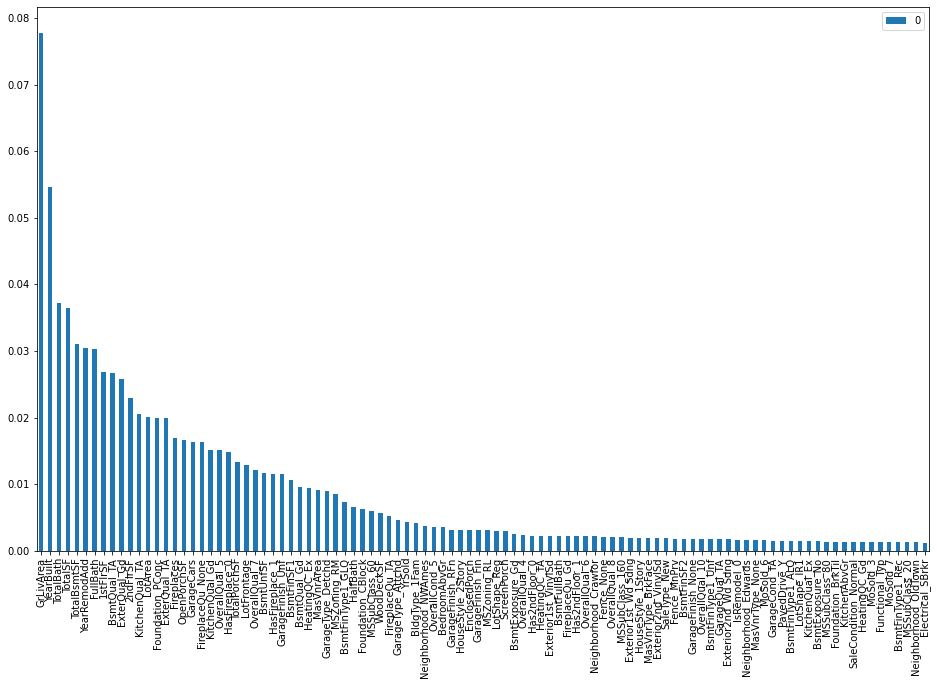

In [88]:

rf = RandomForestClassifier(n_jobs=-1, random_state=42, oob_score=True )
# %prun 
rf.fit(Dataset_training_feature_remOut,Dataset_training_SalePrice_remOut.astype('int'))

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.DataFrame ( importances, index=Dataset_training_feature_remOut.columns )

forest_importances = forest_importances.sort_values (forest_importances.columns[0],ascending=False)
forest_importances.head(100).plot.bar(figsize=(16,10))

In [89]:

#me quedo con las que estan arriba del 0.0002
colsel = forest_importances [ forest_importances.values > 0.0002 ].index
print(colsel)

Dataset_training_feature_remOut_FS = Dataset_training_feature_remOut[colsel]
Dataset_training_feature_remOut_FS

Index(['GrLivArea', 'YearBuilt', 'TotalBath', 'TotalSF', 'TotalBsmtSF',
       'YearRemodAdd', 'FullBath', '1stFlrSF', 'BsmtQual_TA', 'ExterQual_Gd',
       ...
       'Exterior2nd_Brk Cmn', 'Heating_GasW', 'BsmtExposure_None',
       'OverallQual_1', 'LandSlope_Sev', 'MSSubClass_180', 'MoSold_2',
       'Functional_Mod', 'HouseStyle_2.5Unf', 'Street_Pave'],
      dtype='object', length=276)


,GrLivArea,YearBuilt,TotalBath,TotalSF,TotalBsmtSF,YearRemodAdd,FullBath,1stFlrSF,BsmtQual_TA,ExterQual_Gd,...,Exterior2nd_Brk Cmn,Heating_GasW,BsmtExposure_None,OverallQual_1,LandSlope_Sev,MSSubClass_180,MoSold_2,Functional_Mod,HouseStyle_2.5Unf,Street_Pave
Id,,,,,,,,,,,,,,,,,,,,,
1,0.529194,-1.050994,1.642256,0.701144,0.002513,-0.878668,0.789741,-0.803645,0,1,...,0,0,0,0,0,0,1,0,0,1
2,-0.381965,-0.156734,0.368581,0.493602,0.341114,0.429577,0.789741,0.418479,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.659631,-0.984752,1.642256,0.532523,0.065397,-0.830215,0.789741,-0.576677,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.541448,1.863632,-0.268257,0.089163,-0.105819,0.720298,-1.026041,-0.439421,1,0,...,0,0,0,0,0,0,1,0,0,1
5,1.282295,-0.951632,1.642256,1.157362,0.256237,-0.733308,0.789741,0.112127,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.416598,-0.918511,0.368581,-0.350128,0.096134,-0.733308,0.789741,-0.465737,0,0,...,0,0,0,0,0,0,0,0,0,1
1457,1.106648,-0.222975,1.005418,1.318912,0.515947,-0.151865,0.789741,1.981524,0,0,...,0,0,0,0,0,0,1,0,0,1
1458,1.470102,1.002492,-0.268257,0.918333,0.261554,-1.024029,0.789741,0.228208,1,0,...,0,0,0,0,0,0,0,0,0,1


Evaluo el modelo 

In [90]:
#modelo
regressor_Gradient_boost = GradientBoostingRegressor(random_state=0)
regressor_Gradient_boost.fit(Dataset_training_feature_remOut_FS,Dataset_training_SalePrice_remOut)

#cross validation 
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
log_y = np.log(Dataset_training_SalePrice_remOut)
score = cross_val_score(regressor_Gradient_boost, Dataset_training_feature_remOut_FS, log_y, cv=cv, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score

0.010199430071684383

Con la selecion de 276 columnas en vez de 346, el error disminuye un pporcentaje muy pequño Nos quedamos con 270 columnas 

Seleciono las mismas columnas para el test data que utilizare para hacer la prediccion 

In [91]:
Dataset_test_FS = Dataset_test[colsel]
Dataset_test_FS

,GrLivArea,YearBuilt,TotalBath,TotalSF,TotalBsmtSF,YearRemodAdd,FullBath,1stFlrSF,BsmtQual_TA,ExterQual_Gd,...,Exterior2nd_Brk Cmn,Heating_GasW,BsmtExposure_None,OverallQual_1,LandSlope_Sev,MSSubClass_180,MoSold_2,Functional_Mod,HouseStyle_2.5Unf,Street_Pave
Id,,,,,,,,,,,,,,,,,,,,,
1461,-1.442112,0.340945,-1.475617,-0.555225,0.056162,1.072885,-1.028720,-0.612887,1,0,...,0,0,0,0,0,0,0,0,0,1
1462,-0.194908,0.439695,-0.873569,0.541179,0.396078,1.214908,-1.028720,0.588954,1,0,...,0,0,0,0,0,0,0,0,0,1
1463,0.449155,-0.844059,0.330528,0.737906,0.098305,-0.678742,0.773083,-0.505930,0,0,...,0,0,0,0,0,0,0,0,0,1
1464,0.400213,-0.876976,0.330528,0.484751,0.096517,-0.678742,0.773083,-0.512506,1,0,...,0,0,0,0,0,0,0,0,0,1
1465,-0.313771,-0.679475,-0.271520,-0.492504,0.364927,-0.394694,0.773083,0.474414,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-0.816336,0.044694,-0.873569,-1.437460,-0.341235,0.646813,-1.028720,-2.122081,1,0,...,0,0,0,0,0,0,0,0,0,1
2916,-0.816336,0.044694,-0.873569,-0.869946,-0.341235,0.646813,-1.028720,-2.122081,1,0,...,0,0,0,0,0,0,0,0,0,1
2917,-0.455313,0.373861,-0.271520,0.769361,0.327832,-0.584059,-1.028720,0.338021,1,0,...,0,0,0,0,0,0,0,0,0,1


### Hyperparameter tunning 

In [75]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

log_y = np.log(Dataset_training_SalePrice_remOut) 

regressor_Gradient_boost=GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
search_grid={'n_estimators':[500,2000,2500],'learning_rate':[.001,0.01,.1],'max_depth':[1,4,6],'subsample':[.5,0.8,1],'random_state':[1]}
search=GridSearchCV(estimator=regressor_Gradient_boost,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=multiprocessing.cpu_count() - 1,cv=cv)
search.fit(Dataset_training_feature_remOut_FS,log_y)

search.best_params_
search.best_score_

-8.641457449059856e-05

In [76]:
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 2500,
 'random_state': 1,
 'subsample': 0.5}

Se encontro los mejores hyperparametros para utilizar 

### Creacion del modelo con los hyperparametros optimos 

In [92]:
#modelo
regressor_Gradient_boost = GradientBoostingRegressor(learning_rate= 0.01,max_depth=4,n_estimators=2500,subsample=0.5,random_state=1)
regressor_Gradient_boost.fit(Dataset_training_feature_remOut_FS,Dataset_training_SalePrice_remOut)

#cross validation 
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
log_y = np.log(Dataset_training_SalePrice_remOut)
score = cross_val_score(regressor_Gradient_boost, Dataset_training_feature_remOut_FS, log_y, cv=cv, scoring="neg_mean_squared_error")
score = -1 * score.mean()
score = np.sqrt(score)
score


0.00929594398060781

In [93]:
Dataset_training_feature_remOut_FS.head()

,GrLivArea,YearBuilt,TotalBath,TotalSF,TotalBsmtSF,YearRemodAdd,FullBath,1stFlrSF,BsmtQual_TA,ExterQual_Gd,...,Exterior2nd_Brk Cmn,Heating_GasW,BsmtExposure_None,OverallQual_1,LandSlope_Sev,MSSubClass_180,MoSold_2,Functional_Mod,HouseStyle_2.5Unf,Street_Pave
Id,,,,,,,,,,,,,,,,,,,,,
1,0.529194,-1.050994,1.642256,0.701144,0.002513,-0.878668,0.789741,-0.803645,0,1,...,0,0,0,0,0,0,1,0,0,1
2,-0.381965,-0.156734,0.368581,0.493602,0.341114,0.429577,0.789741,0.418479,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.659631,-0.984752,1.642256,0.532523,0.065397,-0.830215,0.789741,-0.576677,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.541448,1.863632,-0.268257,0.089163,-0.105819,0.720298,-1.026041,-0.439421,1,0,...,0,0,0,0,0,0,1,0,0,1
5,1.282295,-0.951632,1.642256,1.157362,0.256237,-0.733308,0.789741,0.112127,0,1,...,0,0,0,0,0,0,0,0,0,1


In [94]:
Dataset_test_FS.head()

,GrLivArea,YearBuilt,TotalBath,TotalSF,TotalBsmtSF,YearRemodAdd,FullBath,1stFlrSF,BsmtQual_TA,ExterQual_Gd,...,Exterior2nd_Brk Cmn,Heating_GasW,BsmtExposure_None,OverallQual_1,LandSlope_Sev,MSSubClass_180,MoSold_2,Functional_Mod,HouseStyle_2.5Unf,Street_Pave
Id,,,,,,,,,,,,,,,,,,,,,
1461,-1.442112,0.340945,-1.475617,-0.555225,0.056162,1.072885,-1.028720,-0.612887,1,0,...,0,0,0,0,0,0,0,0,0,1
1462,-0.194908,0.439695,-0.873569,0.541179,0.396078,1.214908,-1.028720,0.588954,1,0,...,0,0,0,0,0,0,0,0,0,1
1463,0.449155,-0.844059,0.330528,0.737906,0.098305,-0.678742,0.773083,-0.505930,0,0,...,0,0,0,0,0,0,0,0,0,1
1464,0.400213,-0.876976,0.330528,0.484751,0.096517,-0.678742,0.773083,-0.512506,1,0,...,0,0,0,0,0,0,0,0,0,1
1465,-0.313771,-0.679475,-0.271520,-0.492504,0.364927,-0.394694,0.773083,0.474414,0,1,...,0,0,0,0,0,0,0,0,0,1


Se consiguio disminuir el error 

### Evaluacion del modelo con test set 

Prediccion final 
<!--  -->

In [95]:


#ID
Dataset_test_prueba = pd.read_csv("Data/test.csv" , sep=",")
ID=Dataset_test_prueba["Id"]

# Submission set
solucion = pd.concat((ID, pd.Series(np.exp(regressor_Gradient_boost.predict(Dataset_test_FS)), 
                                       name='SalePrice')), axis=1)
solucion




,Id,SalePrice
0,1461,125553.088154
1,1462,166365.472646
2,1463,191380.714869
3,1464,199897.029650
4,1465,187074.433785
...,...,...
1454,2915,86373.342353
1455,2916,90186.624046
1456,2917,172284.721803
1457,2918,123601.143836


In [81]:
solucion.to_csv('submission.csv', index=False)
